In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

In [2]:
location = "DC_Properties.csv"
df = pd.read_csv(location)
df.head()
#imported data set

/Users/vannesadamota/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
df['SALEDATE']= pd.to_datetime(df['SALEDATE'])

In [4]:
df2= df[['BEDRM','BATHRM','GBA','PRICE','WARD','QUADRANT','STYLE','SALEDATE','KITCHENS','AYB']]
df2.head()
#reduced data size by getting rid of unnecessary columns

,BEDRM,BATHRM,GBA,PRICE,WARD,QUADRANT,STYLE,SALEDATE,KITCHENS,AYB
0,4,4,2522.0,1095000.0,Ward 2,NW,3 Story,2003-11-25,2.0,1910.0
1,5,3,2567.0,NaN,Ward 2,NW,3 Story,2000-08-17,2.0,1898.0
2,5,3,2522.0,2100000.0,Ward 2,NW,3 Story,2016-06-21,2.0,1910.0
3,5,3,2484.0,1602000.0,Ward 2,NW,3 Story,2006-07-12,2.0,1900.0
4,3,2,5255.0,NaN,Ward 2,NW,3 Story,NaT,1.0,1913.0


In [5]:
len(df2)

158957

In [6]:
df2.isnull().sum()

BEDRM           0
BATHRM          0
GBA         52261
PRICE       60741
WARD            1
QUADRANT      237
STYLE       52261
SALEDATE    26770
KITCHENS    52262
AYB           271
dtype: int64

In [7]:
df2=df2.dropna()

In [8]:
df2.count()

BEDRM       57702
BATHRM      57702
GBA         57702
PRICE       57702
WARD        57702
QUADRANT    57702
STYLE       57702
SALEDATE    57702
KITCHENS    57702
AYB         57702
dtype: int64

In [9]:
df2.isnull().sum()
#clean data

BEDRM       0
BATHRM      0
GBA         0
PRICE       0
WARD        0
QUADRANT    0
STYLE       0
SALEDATE    0
KITCHENS    0
AYB         0
dtype: int64

In [10]:
df2.head()

,BEDRM,BATHRM,GBA,PRICE,WARD,QUADRANT,STYLE,SALEDATE,KITCHENS,AYB
0,4,4,2522.0,1095000.0,Ward 2,NW,3 Story,2003-11-25,2.0,1910.0
2,5,3,2522.0,2100000.0,Ward 2,NW,3 Story,2016-06-21,2.0,1910.0
3,5,3,2484.0,1602000.0,Ward 2,NW,3 Story,2006-07-12,2.0,1900.0
5,5,3,5344.0,1950000.0,Ward 2,NW,4 Story,2010-02-26,1.0,1913.0
7,4,3,2401.0,1050000.0,Ward 2,NW,3 Story,2011-09-29,2.0,1906.0


In [11]:
pd.pivot_table(df2,index=["BEDRM", "WARD"], values=["PRICE"]).round()

PRICE
BEDRM WARD              
0     Ward 1    325833.0
      Ward 2   3587500.0
      Ward 3   2191180.0
      Ward 4    316700.0
      Ward 5    319837.0
      Ward 6   1350413.0
      Ward 7    168944.0
      Ward 8   2777021.0
1     Ward 1    399136.0
      Ward 2    814618.0
      Ward 3   1294000.0
      Ward 4    320533.0
      Ward 5    211724.0
      Ward 6    345632.0
      Ward 7    191259.0
      Ward 8    135741.0
2     Ward 1    469150.0
      Ward 2    777097.0
      Ward 3    640142.0
      Ward 4    316877.0
      Ward 5    296409.0
      Ward 6    482773.0
      Ward 7    184625.0
      Ward 8    180088.0
3     Ward 1    500986.0
      Ward 2   1030835.0
      Ward 3    740002.0
      Ward 4    417920.0
      Ward 5    381524.0
      Ward 6    568278.0
...                  ...
9     Ward 2   6007558.0
      Ward 3   4422222.0
      Ward 4    791036.0
      Ward 5    335000.0
      Ward 6    653279.0
      Ward 7    340000.0
      Ward 8    253700.0
10    Ward 1    918000.0
      Ward 2    843000.0
      Ward 3   1297000.0
      Ward 5    350000.0
      Ward 6    921250.0
      Ward 7    353500.0
      Ward 8    238911.0
11    Ward 2    280000.0
      Ward 4    700000.0
      Ward 5   2200000.0
      Ward 6   1850000.0
      Ward 8    348920.0
12    Ward 1    748000.0
      Ward 2  23960287.0
      Ward 4    291500.0
      Ward 5    560833.0
      Ward 6    200000.0
      Ward 7    415000.0
      Ward 8    306438.0
13    Ward 8    442500.0
14    Ward 1    925000.0
15    Ward 1   1105000.0
20    Ward 1   1900000.0

[103 rows x 1 columns]

In [12]:
pd.pivot_table(df2,index=["BEDRM"], values=["PRICE"],columns=["WARD"],aggfunc=[np.mean],fill_value=0).round()

mean                                                         \
           PRICE                                                          
WARD      Ward 1      Ward 2     Ward 3    Ward 4     Ward 5     Ward 6   
BEDRM                                                                     
0       325833.0   3587500.0  2191180.0  316700.0   319837.0  1350413.0   
1       399136.0    814618.0  1294000.0  320533.0   211724.0   345632.0   
2       469150.0    777097.0   640142.0  316877.0   296409.0   482773.0   
3       500986.0   1030835.0   740002.0  417920.0   381524.0   568278.0   
4       637269.0   1388698.0   975302.0  582128.0   478109.0   722247.0   
5       781456.0   1734105.0  1419883.0  751355.0   574988.0   869920.0   
6       842401.0   2282718.0  1939516.0  815397.0   544911.0   892812.0   
7       907553.0   2486571.0  2700912.0  887765.0   623350.0   994973.0   
8       819119.0   3038708.0  2566509.0  510266.0   407348.0   573041.0   
9      1037317.0   6007558.0  4422222.0  791036.0   335000.0   653279.0   
10      918000.0    843000.0  1297000.0       0.0   350000.0   921250.0   
11           0.0    280000.0        0.0  700000.0  2200000.0  1850000.0   
12      748000.0  23960287.0        0.0  291500.0   560833.0   200000.0   
13           0.0         0.0        0.0       0.0        0.0        0.0   
14      925000.0         0.0        0.0       0.0        0.0        0.0   
15     1105000.0         0.0        0.0       0.0        0.0        0.0   
20     1900000.0         0.0        0.0       0.0        0.0        0.0   

                            
                            
WARD     Ward 7     Ward 8  
BEDRM                       
0      168944.0  2777021.0  
1      191259.0   135741.0  
2      184625.0   180088.0  
3      239135.0   224414.0  
4      298230.0   277979.0  
5      324648.0   265254.0  
6      295781.0   263135.0  
7      265101.0   327200.0  
8      280391.0   355596.0  
9      340000.0   253700.0  
10     353500.0   238911.0  
11          0.0   348920.0  
12     415000.0   306438.0  
13          0.0   442500.0  
14          0.0        0.0  
15          0.0        0.0  
20          0.0        0.0

In [13]:
df2.groupby(['PRICE','WARD']).mean()


BEDRM     BATHRM      GBA  KITCHENS          AYB
PRICE      WARD                                                    
1.0        Ward 5    3.0   1.000000   1420.0  1.000000  1929.000000
           Ward 8    6.0   3.000000   2150.0  3.000000  1953.000000
10.0       Ward 1    3.0   1.000000    990.0  1.000000  1912.000000
           Ward 2    3.0   2.000000   2272.0  2.000000  1890.000000
           Ward 5    3.0   2.000000   1380.0  1.000000  1927.000000
           Ward 7    2.0   1.000000    880.0  1.000000  1942.000000
250.0      Ward 1    3.6   2.200000   2331.2  1.600000  1909.200000
           Ward 4    3.0   1.000000   1444.0  1.000000  1927.000000
           Ward 5    5.5   4.000000   2029.0  1.500000  1907.500000
           Ward 6    3.0   2.333333   1574.0  1.666667  1906.333333
           Ward 7    3.0   1.000000    997.0  1.000000  1945.000000
           Ward 8    2.0   1.000000   1132.0  1.000000  1905.000000
500.0      Ward 1    4.0   4.000000   2421.0  2.000000  1900.000000
           Ward 5    4.0   2.000000   1734.0  2.000000  1909.000000
           Ward 6    7.0   2.000000   4158.0  2.000000  1916.000000
936.0      Ward 6    4.0   2.000000   2142.0  1.000000  1900.000000
1000.0     Ward 5    3.0   1.000000   1024.0  1.000000  1925.000000
           Ward 7    3.0   1.000000    988.0  1.000000  1911.000000
           Ward 8    4.0   4.000000   2736.0  4.000000  1937.000000
1377.0     Ward 1    3.0   1.000000   1424.0  1.000000  1900.000000
2000.0     Ward 7    3.0   1.000000   1396.0  1.000000  1928.000000
3000.0     Ward 7    3.0   2.000000   1170.0  1.000000  1993.000000
3997.0     Ward 7    3.0   1.000000   1188.0  1.000000  1948.000000
4101.0     Ward 8    4.0   4.000000   2464.0  4.000000  1945.000000
4156.0     Ward 4    4.0   2.000000   1914.0  1.000000  1937.000000
4500.0     Ward 1    3.0   3.000000   2443.0  2.000000  1907.000000
4850.0     Ward 8    3.0   1.666667   1200.0  1.000000  1998.666667
5000.0     Ward 5    3.0   2.000000   1802.0  2.000000  1913.000000
           Ward 6    3.0   1.000000   1254.0  1.000000  1918.000000
           Ward 7    4.0   4.000000   2800.0  4.000000  1940.000000
...                  ...        ...      ...       ...          ...
7550000.0  Ward 2    6.0   5.000000   5580.0  2.000000  1820.000000
           Ward 3    4.5   4.000000   3354.5  4.000000  1936.000000
7576980.0  Ward 6    3.0   1.000000   1316.0  1.000000  1908.000000
7652000.0  Ward 3    5.0   5.000000   6465.0  1.000000  1927.000000
7700000.0  Ward 3    6.0   5.000000   7788.0  1.000000  1927.000000
7785000.0  Ward 3    8.0   8.000000  11478.0  2.000000  1927.000000
7850000.0  Ward 2    8.0   7.000000   8085.0  1.000000  1810.000000
7950000.0  Ward 3    7.0   6.000000   7560.0  1.000000  1929.000000
8100000.0  Ward 2    9.0   8.000000   6441.0  1.000000  1928.000000
8375000.0  Ward 3    7.0   6.000000   8148.0  2.000000  1930.000000
8450000.0  Ward 2    7.0   8.500000   8240.0  1.000000  1914.500000
8500000.0  Ward 2    9.0   8.000000  10001.0  2.000000  1911.000000
8600000.0  Ward 2    9.0   7.000000   8840.0  1.000000  1870.000000
9000000.0  Ward 2    6.0   7.000000   6164.0  1.000000  1926.000000
9100000.0  Ward 3    6.0   9.000000   6518.0  2.000000  1925.000000
10400000.0 Ward 3    7.0   5.000000  10379.0  1.000000  1930.000000
10750000.0 Ward 3    7.0   7.000000   6997.0  3.000000  1927.000000
11000000.0 Ward 6    0.0   0.000000    792.0  1.000000  1900.000000
           Ward 7    4.0   4.000000   3420.0  4.000000  1943.000000
11111111.0 Ward 2    8.0   8.000000   6937.0  1.000000  1941.000000
11984000.0 Ward 2    6.0   6.000000  10760.0  2.000000  1961.000000
12250000.0 Ward 3    9.0  12.000000  12713.0  2.000000  2008.000000
14000000.0 Ward 3    6.0   5.000000   7725.0  2.000000  1962.000000
15000000.0 Ward 3    7.0  11.000000  11616.0  2.000000  1986.000000
16100000.0 Ward 2    9.0   9.000000   7910.0  2.000000  1805.000000
18000000.0 Ward 3    7.0   9.000000  15673.0  2.000000  1994.000000
2200000

In [14]:
meanprice = df2['PRICE'].mean()
stdprice = df2['PRICE'].std()
toprange = meanprice + stdprice * 1.96
botrange = meanprice - stdprice * 1.96

copydf2= df2.copy()
copydf2 = copydf2.drop(copydf2[copydf2['PRICE'] > toprange].index)
copydf2 = copydf2.drop(copydf2[copydf2['PRICE'] < botrange].index)

copydf2.head()  #droping outliers

,BEDRM,BATHRM,GBA,PRICE,WARD,QUADRANT,STYLE,SALEDATE,KITCHENS,AYB
0,4,4,2522.0,1095000.0,Ward 2,NW,3 Story,2003-11-25,2.0,1910.0
3,5,3,2484.0,1602000.0,Ward 2,NW,3 Story,2006-07-12,2.0,1900.0
7,4,3,2401.0,1050000.0,Ward 2,NW,3 Story,2011-09-29,2.0,1906.0
8,3,3,1488.0,1430000.0,Ward 2,NW,2 Story,2018-05-03,2.0,1908.0
14,3,3,2692.0,1325000.0,Ward 2,NW,2 Story,2011-09-30,2.0,1917.0


In [15]:
len(copydf2)

56013

In [16]:
print(meanprice)
print(stdprice)
print(toprange)
print(botrange)



580152.4931024921
607678.052334264
1771201.4756776495
-610896.4894726654


In [17]:
testmean=df2['PRICE'].mean()
testmean

580152.4931024921

In [18]:
copydf2.head()

,BEDRM,BATHRM,GBA,PRICE,WARD,QUADRANT,STYLE,SALEDATE,KITCHENS,AYB
0,4,4,2522.0,1095000.0,Ward 2,NW,3 Story,2003-11-25,2.0,1910.0
3,5,3,2484.0,1602000.0,Ward 2,NW,3 Story,2006-07-12,2.0,1900.0
7,4,3,2401.0,1050000.0,Ward 2,NW,3 Story,2011-09-29,2.0,1906.0
8,3,3,1488.0,1430000.0,Ward 2,NW,2 Story,2018-05-03,2.0,1908.0
14,3,3,2692.0,1325000.0,Ward 2,NW,2 Story,2011-09-30,2.0,1917.0


In [19]:
copydf2.corr()

,BEDRM,BATHRM,GBA,PRICE,KITCHENS,AYB
BEDRM,1.000000,0.598820,0.629087,0.313547,0.373478,-0.030407
BATHRM,0.598820,1.000000,0.652954,0.464375,0.435502,0.087242
GBA,0.629087,0.652954,1.000000,0.454840,0.361524,0.021480
PRICE,0.313547,0.464375,0.454840,1.000000,0.043094,-0.122712
KITCHENS,0.373478,0.435502,0.361524,0.043094,1.000000,-0.116364
AYB,-0.030407,0.087242,0.021480,-0.122712,-0.116364,1.000000


/Users/vannesadamota/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


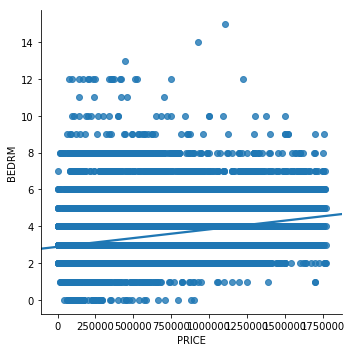

In [20]:
sns.lmplot(x="PRICE", y="BEDRM", data=copydf2)

In [21]:
import statsmodels.formula.api as smf

In [22]:
result = smf.ols('PRICE ~ BATHRM + GBA + BEDRM', data= df).fit()

In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.185e+04
Date:                Sun, 20 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:43:48   Log-Likelihood:            -8.3937e+05
No. Observations:               57900   AIC:                         1.679e+06
Df Residuals:                   57896   BIC:                         1.679e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.376e+05   6413.540    -21.448      0.000    -1.5e+05   -1.25e+05
BATHRM      1.143e+05   2769.627     41.254      0.000    1.09e+05     1.2e+05
GBA          394.1174      3.606    109.293      0.000     387.049     401.185
BEDRM      -6.265e+04   2475.902    -25.305      0.000   -6.75e+04   -5.78e+04
==============================================================================
Omnibus:                    90402.015   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        266236695.532
Skew:                           9.318   Prob(JB):                         0.00
Kurtosis:                     334.677   Cond. No.                     6.38e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""